Лаба №9 (6) Линейная регрессия
Задание: Произвести оценку параметров линейной регрессии, определить доверительные интервалы каждого из параметров
линейной регрессии (y и x), оценить модельную адекватность с помощью графиков и коэффициент детерминации.

Алгос:
1. Построить прямую регрессию
2. Определить доверительный интервал коэффициент линейной регрессии на уровне значимости альфа = 0.1 (использовать
формулу 7.2.3 стр. 193, 217)
3. Построить для оценки адекватности модели совмещенный график исходных данных линейной регрресии и доверительных интервалов, построить график остатка
4. Вычислить коэффициент детерминации и по его значению сказать насколько сильный является зависимость двух величин.
т.е чем ближе к 1 тем выше зависимость
5. (Как замечание) в случае неадекватность модели определяем аномальное значение и повторяем весь алгоритм без
аномального наблюдения

In [71]:
# !pip install scikit-learn

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data():
    np.random.seed(10)

#     # создание тестового набора данных
#     n = 10 # количество наблюдений
#     x = np.linspace(0, 10, n) # независимая переменная
#     y = 3*x + 2 + np.random.randn(n)*2 # зависимая переменная с шумом
#     x_2d = x.reshape(-1, 1)
#     y_2d = y.reshape(-1, 1)
    x = np.array([19.65, 20.01, 31.15, 32.50, 35.95, 50.15, 59.65]).reshape((-1, 1))
    y = np.array([3.44, 3.93, 4.98, 5.45, 6.40, 8.88, 11.22])
#     return x_2d, y_2d
    return x, y    

Свободный член = -0.3433360281675979
Наклон = [0.18751848]
Коэффициент детерминации = 0.9826964367523972
beta = 0.95
alpha = 0.050000000000000044
t = 6.959963984540054
Точечные доверительные интервалы для параметров линейной регрессии построены: alpha = (-1.6003685189821075; 0.9136964626469117), beta = ([0.09587783]; [0.27915913])


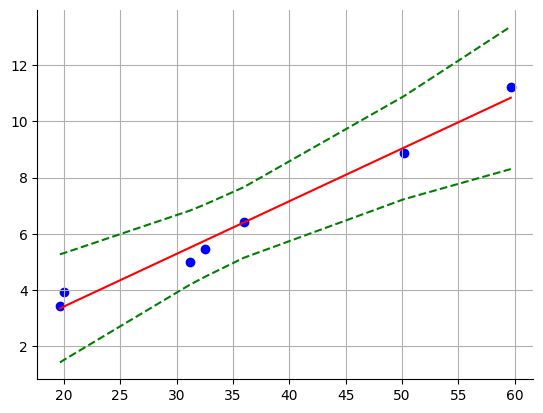

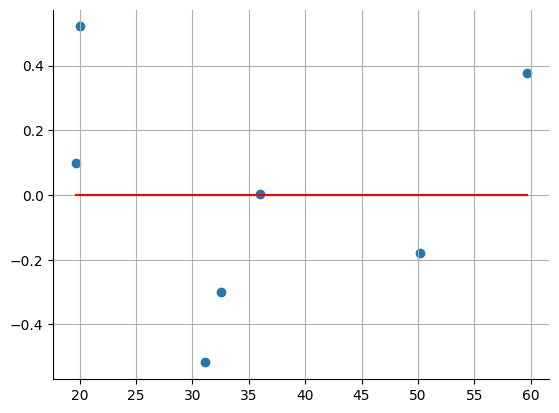

In [4]:

x, y = load_data()

n = len(x) # длина массива

model = LinearRegression().fit(x, y)

a = model.intercept_ # свободный член
b = model.coef_ # наклон
y_pred = model.predict(x)
R2 = r2_score(y, y_pred) # коэффициент детерминации
print(f"Свободный член = {a}\n"
      f"Наклон = {b}\n"
      f"Коэффициент детерминации = {R2}")

x_mean = x.mean()
y_mean = y.mean()

# зададим уровень доверительной вероятности beta = 0.95
beta = 0.95
alpha = 1 - beta
t = stats.norm.ppf(1 - alpha/2, n-2)
print(f"beta = {beta}\n"
      f"alpha = {alpha}\n"
      f"t = {t}")

# расчет точечных доверительных интервалов #
SUM = 0
for k in range(n):
    SUM += math.pow(y[k] - y_pred[k], 2)
D1 = 1/(n-2) * SUM

a_left = a - t * math.sqrt(D1/(n-2))
a_right = a + t * math.sqrt(D1/(n-2))

SUM = 0
for k in range(n):
    SUM += math.pow(x[k] - x_mean, 2)
eb = math.sqrt(n/(n-2) * D1/SUM)

b_left = b - t*eb
b_right = b + t*eb


print(f"Точечные доверительные интервалы для параметров линейной регрессии построены: "
      f"alpha = ({a_left}; {a_right}), beta = ({b_left}; {b_right})")

# доверительный интервал для линии регрессии
y_left_list = []
y_right_list = []

for i in range(n):
    y_left_list.append(y_pred[i]-t * math.sqrt(D1/(n-2) * (1+(n*math.pow(x[i]-x_mean, 2))/SUM)))
    y_right_list.append(y_pred[i]+t * math.sqrt(D1/(n-2) * (1+(n*math.pow(x[i]-x_mean, 2))/SUM)))


def linear_regression_view():
    fig, ax = plt.subplots()

    # Turn off top/right axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # Ticks outside the axes
    ax.tick_params(direction='out')
    ax.grid(True)

    plt.scatter(x, y, color='blue')
    ax.plot(x, y_pred, color='red')
    ax.plot(x, y_left_list, color='green', linestyle='--')
    ax.plot(x, y_right_list, color='green', linestyle='--')


def balans_chart_view():
    fig, ax = plt.subplots()

    # Turn off top/right axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # Ticks outside the axes
    ax.tick_params(direction='out')
    ax.grid(True)

    plt.scatter(x, y - y_pred)
    ax.plot(x, np.zeros(n), color='red')


linear_regression_view()
plt.show()
balans_chart_view()
plt.show()

Вопросы:
1) Полиномиальная модель.
2) Как проверить адекватность выбранной модели (не для лин. регрессии)
3) Какими свойствами должны обладать коэф лин регрессии, чтобы однозначно установить, что зависимости м/д ними нет
4) Сравнить методы апроксимации для построения различных моделей (для лин регрессии МНК)